# Satellite notebook


In [ ]:
# Cell 1
import pandas as pd

classes = {1: 'red soil',
           2: 'cotton crop',
           3: 'grey soil',
           4: 'damp grey soil',
           5: 'soil with vegetation stubble',
           6: 'mixture class (all types present)', # none of these in dataset
           7: 'very damp grey soil'}

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/"
df_trn = pd.read_csv(url + "sat.trn", delim_whitespace=True, header=None)
df_tst = pd.read_csv(url + "sat.tst", delim_whitespace=True, header=None)
df = pd.concat([df_trn, df_tst])


df[36] = df[36].apply(lambda row: classes[row])
df = df.rename(columns={36: 'classes'})

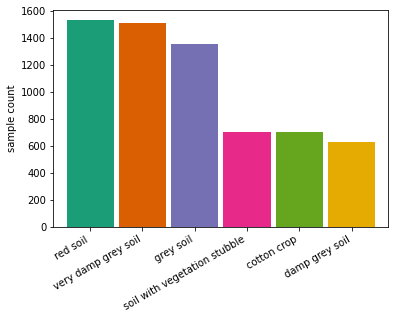

In [ ]:
# Cell 2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import cm

cmap = cm.get_cmap('Dark2')
colors = cmap.__dict__['colors']
df['classes'].value_counts().plot(kind='bar', width=.9, color=colors)

locs, labels = plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('sample count');

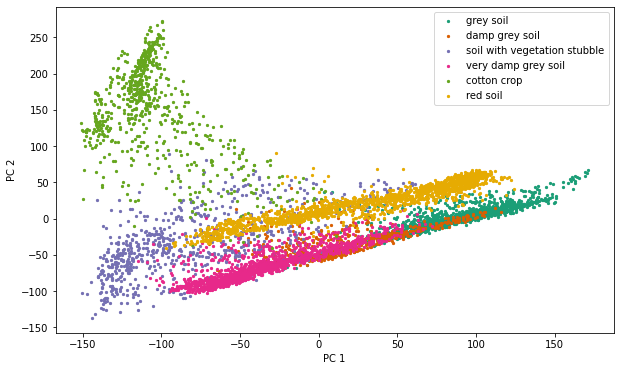

In [ ]:
# Cell 3
from sklearn.decomposition import PCA

X = df.iloc[:,:-1]
y = df['classes']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for cl, color in zip(y.unique(), colors):
    plt.scatter(X_pca[y == cl, 0],
                X_pca[y == cl, 1],
                color=[color], label=cl, alpha=1, sizes=(5,))

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.gcf().set_size_inches(10,6);

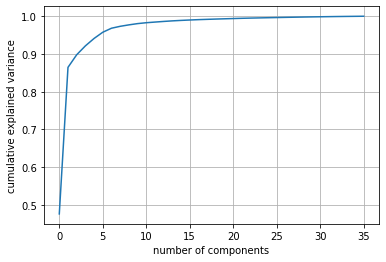

In [ ]:
# Cell 4
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

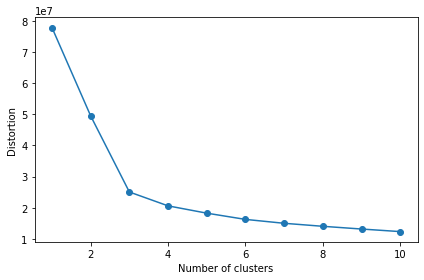

In [ ]:
# Cell 5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

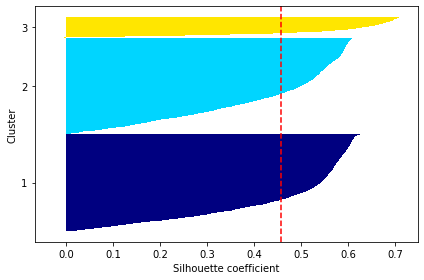

In [ ]:
# Cell 6
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()